## Submission Deadline

- All submissions must be made before 10:00 PM on Thursday, April 18, 2024.

## Submission Guidelines

**- Format: Submissions are to be made in PDF format via Avenue to Learn, either individually or as a group of up to three members.  
    - GitHub Repository: Your submission must include a link to a public GitHub repository containing the assignment.  
    - Team Submissions: For group submissions, Question 15 must detail each member's contributions. Note that while there are no points allocated to Question 15, failure to provide this information will result in the assignment not being graded.**  

Please view the submission in the public GitHub repository available here: `https://github.com/kyleosung/stats_3da3_a6.git`

## Late Submissions

- 15% will be deducted from assignments each day after the due date (rounding up).

-   Assignments won't be accepted after 48 hours after the due date.

## Assignment Standards

Please ensure your assignment adheres to the following standards for submission:

- **Title Page Requirements:** Each submission must include a title page featuring your group members' names and student numbers. Assignments lacking a title page will not be considered for grading.
- **Individual Work:** While discussing homework problems with peers and group is permitted, the final written submission must be your group work.
- **Formatting Preferences:** The use of LaTeX for document preparation is highly recommended.
- **Font and Spacing:** Submissions must utilize an eleven-point font (Times New Roman or a similar font) with 1.5 line spacing. Ensure margins of at least 1 inch on all sides.
- **Submission Content:** Do not include the assignment questions within your PDF. Instead, clearly mark each response with the corresponding question number. Screenshots are not an acceptable form of submission under any circumstances.
- **Academic Writing:** Ensure that your writing and any references used are appropriate for an undergraduate level of study.
- **Originality Checks:** Be aware that the instructor may use various tools, including those available on the internet, to verify the originality of submitted assignments.
-  Assignment policy on the use of generative AI:
    -  Students are not permitted to use generative AI in this assignment. In alignment with [McMaster academic integrity policy](https://secretariat.mcmaster.ca/app/uploads/Academic-Integrity-Policy-1-1.pdf), it "shall be an offence knowingly to ...  submit academic work for assessment that was purchased or acquired from another source".  This includes work created by generative AI tools. Also state in the policy is the following, "Contract Cheating is the act of"outsourcing of student work to third parties" (Lancaster & Clarke, 2016, p. 639)
    with or without payment." Using Generative AI tools is a form of contract cheating.  Charges of academic dishonesty will be brought forward to the Office of Academic Integrity. 

\newpage

## Chronic Kidney Disease Classification Challenge

### Overview

Engage with the dataset from the [Early Stage of Indians Chronic Kidney Disease (CKD)](https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease) project, which comprises data on 250 early-stage CKD patients and 150 healthy controls.

For foundational knowledge on the subject, refer to "Predict, diagnose, and treat chronic kidney disease with machine learning: a systematic literature review" by [Sanmarchi et al., (2023)](https://link.springer.com/article/10.1007/s40620-023-01573-4).

### Objectives

Analyze the dataset using two classification algorithms, focusing on exploratory data analysis, feature selection, engineering, and especially on handling missing values and outliers. Summarize your findings with insightful conclusions.

**Classifier Requirement:** Ensure at least one of the classifiers is interpretable, to facilitate in-depth analysis and inference.

### Guidelines

- **Teamwork:** Group submissions should compile the workflow (Python codes and interpretations) into a single PDF, including a GitHub repository link. The contributions listed should reflect the GitHub activity.
- **Content:** Address the following questions in your submission, offering detailed insights and conclusions from your analysis.

### Assignment Questions

1. **Classification Problem Identification:** Define and describe a classification problem based on the dataset.
2. **Variable Transformation:** Implement any transformations chosen or justify the absence of such modifications.
3. **Dataset Overview:** Provide a detailed description of the dataset, covering variables, summaries, observation counts, data types, and distributions (at least three statements).
4. **Association Between Variables:** Analyze variable relationships and their implications for feature selection or extraction (at least three statements).
5. **Missing Value Analysis and Handling:** Implement your strategy for identifying and addressing missing values in the dataset, or provide reasons for not addressing them.
6. **Outlier Analysis:** Implement your approach for identifying and managing outliers, or provide reasons for not addressing them.
7. **Sub-group Analysis:** Explore potential sub-groups within the data, employing appropriate data science methods to find the sub-groups of patients and visualize the sub-groups. The sub-group analysis must not include the labels (for CKD patients and healthy controls).
8. **Data Splitting:** Segregate 30% of the data for testing, using a random seed of 1. Use the remaining 70% for training and model selection.
9. **Classifier Choices:** Identify the two classifiers you have chosen and justify your selections.
10. **Performance Metrics:** Outline the two metrics for comparing the performance of the classifiers.
11. **Feature Selection/Extraction:** Implement methods to enhance the performance of at least one classifier in (9). The answer for this question can be included in (12).
12. **Classifier Comparison:** Utilize the selected metrics to compare the classifiers based on the test set. Discuss your findings (at least two statements).
13. **Interpretable Classifier Insight:** After re-training the interpretable classifier with all available data, analyze and interpret the significance of predictor variables in the context of the data and the challenge (at least two statements).
14. **[Bonus]** Sub-group Improvement Strategy: If sub-groups were identified, propose and implement a method to improve one classifier performance further. Compare the performance of the new classifer with the results in (12).
15. **Team Contributions:** Document each team member's specific contributions related to the questions above.
16. **Link** to the public GitHub repository.

### Notes

- This assignment encourages you to apply sophisticated machine learning methods to a vital healthcare challenge, promoting the development of critical analytical skills, teamwork, and practical problem-solving abilities in the context of chronic kidney disease diagnosis and treatment.
- Students can choose one classifer not covered in the lectures.

# Section 1: Classification Problem Identification

**Define and describe a classification problem based on the dataset.**

Worked on by: Kyle; Tidied by Ahmed

In [1]:
# import os
# # Avoid memory leak warning from KMeans, please refer to docs before use:
# # https://docs.python.org/3/library/os.html#os.environ.
# # Appears to occur because of MKL & OpenMP library combination in the back-end
# os.environ["OMP_NUM_THREADS"] = '1'

import warnings
from ucimlrepo import fetch_ucirepo 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.covariance import MinCovDet
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split

from pyampute.exploration.mcar_statistical_tests import MCARTest
from scipy import stats as scistats
from scipy.stats import chi2

np.random.seed(0)

In [2]:
chronic_kidney_disease = fetch_ucirepo(id=336)

ckd_features = chronic_kidney_disease.data.features
ckd_target = chronic_kidney_disease.data.targets

In [3]:
print(chronic_kidney_disease.metadata['abstract'])

chronic_kidney_disease.variables.loc[:, ['name', 'role', 'type', 'description', 'missing_values']]

This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.


,name,role,type,description,missing_values
0,age,Feature,Integer,None,yes
1,bp,Feature,Integer,blood pressure,yes
2,sg,Feature,Categorical,specific gravity,yes
3,al,Feature,Categorical,albumin,yes
4,su,Feature,Categorical,sugar,yes
5,rbc,Feature,Binary,red blood cells,yes
6,pc,Feature,Binary,pus cell,yes
7,pcc,Feature,Binary,pus cell clumps,yes
8,ba,Feature,Binary,bacteria,yes
9,bgr,Feature,Integer,blood glucose random,yes


The metadata proposes a classification task, i.e., whether a patient has chronic kidney disease, CKD, or otherwise, using the 24 predictor variables (features).

The exploratory analysis reveals the following:
- There are three categorical variables: `sg`, specific gravity, `al`, albumin, and `su`, sugar. These variables must be encoded as numbers, i.e., with one-hot encoding, to be used in the prediction task.
- All predictor variables have missing values, which must be imputed or removed. Removal must be done very conservatively, however, because there are only 400 observations in total.

In [4]:
print('`sg`, specific gravity, unique values:', sorted(ckd_features['sg'].unique()), sep='\n', end='\n'*2)
print('`al`, albumin, unique values:', sorted(ckd_features['al'].unique()), sep='\n', end='\n'*2)
print('`su`, sugar, unique values:', sorted(ckd_features['su'].unique()), sep='\n', end='\n'*2)

`sg`, specific gravity, unique values:
[1.005, 1.01, 1.015, 1.02, nan, 1.025]

`al`, albumin, unique values:
[0.0, 1.0, 2.0, 3.0, 4.0, nan, 5.0]

`su`, sugar, unique values:
[0.0, 1.0, 2.0, 3.0, 4.0, nan, 5.0]



In [5]:
display(ckd_features.iloc[:3, :11])
display(ckd_features.iloc[:3, 11:])

print('Dataset has shape', ckd_features.shape)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0


,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no
1,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no
2,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes


Dataset has shape (400, 24)


# Section 2: Variable Transformation

**Implement any transformations chosen or justify the absence of such modifications.**

Worked on by: Kyle; Tidied by Ahmed

Binary variables can be encoded with `1`s, `0`s, and `NaN`s instead of `good`/`poor`, `normal`/`abnormal`, `notpresent`/`present`, `yes`/`no`.

In [6]:
bin_cols = ['appet', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'pe', 'ane']
cat_cols = ['sg', 'al', 'su']

# `dm` column typo fix
ckd_features.loc[ckd_features['dm'] == '\tno', 'dm'] = 'no'

ckd_features_clean_noms = ckd_features.astype({col: 'category' for col in bin_cols + cat_cols})

for col in bin_cols + cat_cols:
    ckd_features_clean_noms[col] = ckd_features_clean_noms[col].cat.codes.astype('Int64')

ckd_features_clean_noms[ckd_features_clean_noms.loc[:, bin_cols + cat_cols] == -1] = None

The encoding for binary nominal variables is `<NA>` (`pandas._libs.missing.NAType`) for `NaN`s, and `0` and `1` in alphabetical order, i.e., (`0`, `1`) for (`abnormal`, `normal`), (`notpresent`, `present`), (`no`, `yes`), and (`good`, `poor`), respectively.

In [7]:
for var in bin_cols:
    print(var, set(zip(ckd_features_clean_noms[var], ckd_features[var])))

appet {(<NA>, nan), (0, 'good'), (1, 'poor')}
rbc {(<NA>, nan), (0, 'abnormal'), (1, 'normal')}
pc {(0, 'abnormal'), (1, 'normal'), (<NA>, nan)}
pcc {(0, 'notpresent'), (1, 'present'), (<NA>, nan)}
ba {(0, 'notpresent'), (1, 'present'), (<NA>, nan)}
htn {(<NA>, nan), (1, 'yes'), (0, 'no')}
dm {(<NA>, nan), (1, 'yes'), (0, 'no')}
cad {(<NA>, nan), (1, 'yes'), (0, 'no')}
pe {(<NA>, nan), (1, 'yes'), (0, 'no')}
ane {(<NA>, nan), (1, 'yes'), (0, 'no')}


The encoding for other nominal variables is similarly `<NA>` for `NaN`s, and `0`, `1`, `2`, `3`, `4`, (and `5` for `al` and `su`), in order, as they appear in the original variable.

*Note: `sg` originally has values `1.005`, `1.01`, `1.015`, `1.02`, and `1.025` in the dataset, but it is a nominal variable according to the data dictionary, so was converted as necessary.*

In [8]:
for var in cat_cols:
    ckd_cat_feats_pairs = zip(ckd_features_clean_noms[var], ckd_features[var])
    # Removes extra `(<NA>, nan)` pairs that come from different hashing combinations
    print(var, set((clean_feat, og_feat) for clean_feat, og_feat in ckd_cat_feats_pairs if og_feat in ckd_features[var].unique()))

sg {(2, 1.015), (3, 1.02), (0, 1.005), (4, 1.025), (1, 1.01)}
al {(4, 4.0), (5, 5.0), (0, 0.0), (1, 1.0), (3, 3.0), (2, 2.0)}
su {(4, 4.0), (5, 5.0), (0, 0.0), (1, 1.0), (3, 3.0), (2, 2.0)}


In [9]:
# `class` column typo fix
# Erroneously gives `SettingWithCopyWarning`, so it's ignored
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore')
    ckd_target.loc[ckd_target.loc[:, 'class'] == 'ckd\t', 'class'] = 'ckd'

ckd_target_clean = ckd_target.astype({'class': 'category'})
ckd_target_clean['class'] = ckd_target_clean['class'].cat.codes.astype('Int64')

ckd_target_clean[ckd_target_clean.loc[:, 'class'] == -1] = None

The encoding for the target variable is similar to that of the binary nominal variables, i.e., `0` and `1` in alphabetical order. Concretely, (`0`, `1`) for (`ckd`, `notckd`), respectively.

*Note: `class` has no missing values.*

In [10]:
print('class', set(zip(ckd_target_clean['class'], ckd_target['class'])))

class {(1, 'notckd'), (0, 'ckd')}


Continuous variables are also to be standardized such that they are centered at their mean with unit-variance.

In [11]:
cont_cols = ['sc', 'pot', 'hemo', 'rbcc']

cont_scaler = StandardScaler().fit(ckd_features_clean_noms[cont_cols])
ckd_features_clean_noms[cont_cols] = cont_scaler.transform(ckd_features_clean_noms[cont_cols])

<span style='color:red'>Revisit this modification of `sod` and `bu`</span>

In [12]:
int_cols = list(set(ckd_features_clean_noms.columns).difference(set(cat_cols + bin_cols + cont_cols)))

# `sod` data dictionary violation (`Integer`) fix
ckd_features_clean_noms.loc[ckd_features_clean_noms['sod'] == 4.5, 'sod'] = 5
# `bu` data dictionary violation (`Integer`) fix
ckd_features_clean_noms.loc[ckd_features_clean_noms['bu'] == 50.1, 'bu'] = 50
ckd_features_clean_noms.loc[ckd_features_clean_noms['bu'] == 1.5, 'bu'] = 2
ckd_features_clean_noms.loc[ckd_features_clean_noms['bu'] == 98.6, 'bu'] = 99

ckd_features_clean = ckd_features_clean_noms.astype({col: 'Int64' for col in int_cols})

int_scaler = StandardScaler().fit(ckd_features_clean_noms[int_cols])
ckd_features_clean[int_cols] = int_scaler.transform(ckd_features_clean_noms[int_cols])

In [13]:
ckd_features_clean.dtypes

age      float64
bp       float64
sg         Int64
al         Int64
su         Int64
rbc        Int64
pc         Int64
pcc        Int64
ba         Int64
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn        Int64
dm         Int64
cad        Int64
appet      Int64
pe         Int64
ane        Int64
dtype: object

# Section 3: Dataset Overview

**Provide a detailed description of the dataset, covering variables, summaries, observation counts, data types, and distributions (at least three statements).**

Worked on by: Kyle; Tidied by Ahmed

<span style='color:red'>Note from Ahmed: Repeat this summary after imputing and compare?</span>

In [14]:
print(f'The dataset contains {ckd_features_clean.shape[0]} observations '
      f'with {ckd_features_clean.shape[1]} predictor variables/features '
      f'and {ckd_target_clean.shape[1]} targets.')

The dataset contains 400 observations with 24 predictor variables/features and 1 targets.


The summary tables below describe the column-wise non-null observation count, mean, standard deviation, and 5-number summary.

In [15]:
display(ckd_features_clean.describe().loc[:, bin_cols],
        ckd_features_clean.describe().loc[:, cat_cols],
        ckd_features_clean.describe().loc[:, cont_cols],
        ckd_features_clean.describe().loc[:, int_cols],
        ckd_target_clean.describe())

,appet,rbc,pc,pcc,ba,htn,dm,cad,pe,ane
count,399.0,248.0,335.0,396.0,396.0,398.0,398.0,398.0,399.0,399.0
mean,0.205514,0.810484,0.773134,0.106061,0.055556,0.369347,0.344221,0.085427,0.190476,0.150376
std,0.404584,0.392711,0.419431,0.308305,0.229351,0.483235,0.475712,0.279868,0.39317,0.357888
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,sg,al,su
count,353.0,354.0,351.0
mean,2.481586,1.016949,0.450142
std,1.143323,1.352679,1.099191
min,0.0,0.0,0.0
25%,1.0,0.0,0.0
50%,3.0,0.0,0.0
75%,3.0,2.0,0.0
max,4.0,5.0,5.0


,sc,pot,hemo,rbcc
count,383.000000,3.120000e+02,3.480000e+02,2.690000e+02
mean,0.000000,-7.970832e-17,4.083579e-17,8.452553e-16
std,1.001308,1.001606e+00,1.001440e+00,1.001864e+00
min,-0.466102,-6.671023e-01,-3.241109e+00,-2.547777e+00
25%,-0.378897,-2.594231e-01,-7.655198e-01,-7.889609e-01
50%,-0.309133,-7.126345e-02,4.248496e-02,9.044717e-02
75%,-0.047519,8.553625e-02,8.504897e-01,6.767192e-01
max,12.719271,1.328807e+01,1.813219e+00,3.217231e+00


,sod,pcv,bp,bgr,age,bu,wbcc
count,3.130000e+02,3.290000e+02,3.880000e+02,3.560000e+02,3.910000e+02,3.810000e+02,2.940000e+02
mean,-1.203155e-15,1.295823e-16,-2.380684e-16,-1.796316e-16,9.994847e-17,-5.594825e-17,1.450087e-16
std,1.001601e+00,1.001523e+00,1.001291e+00,1.001407e+00,1.001281e+00,1.001315e+00,1.001705e+00
min,-1.277810e+01,-3.329218e+00,-1.936857e+00,-1.591967e+00,-2.885708e+00,-1.098970e+00,-2.111312e+00
25%,-2.439673e-01,-7.669527e-01,-4.733701e-01,-6.193803e-01,-5.530393e-01,-6.032941e-01,-6.484596e-01
50%,4.528182e-02,1.242700e-01,2.583733e-01,-3.414983e-01,2.050779e-01,-3.058883e-01,-1.381622e-01
75%,4.309474e-01,6.812843e-01,2.583733e-01,1.890038e-01,7.590867e-01,1.699610e-01,4.741947e-01
max,2.455692e+00,1.683910e+00,7.575807e+00,4.319341e+00,2.246163e+00,6.613754e+00,6.121486e+00


,class
count,400.0
mean,0.375
std,0.484729
min,0.0
25%,0.0
50%,0.0
75%,1.0
max,1.0


<span style='color:red'>The predictor variables/features are split into binary, `bin_cols`, categorical, `cat_cols`, continuous, `cont_cols`, and integer, `int_cols`. You can use these partitions to make the different histograms (and even include KDEs for continuous variables).</span>

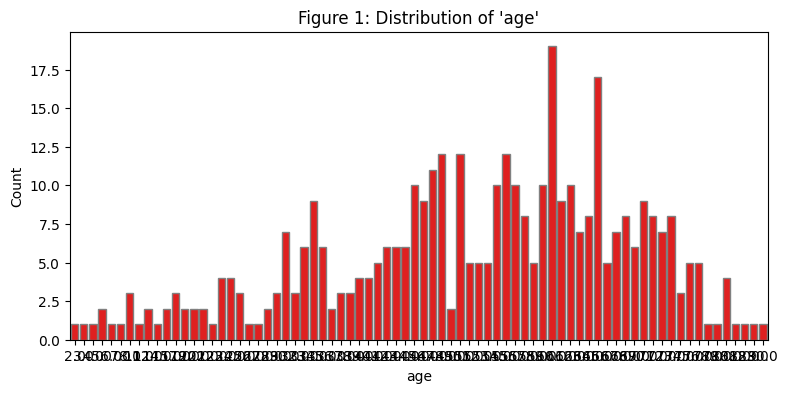

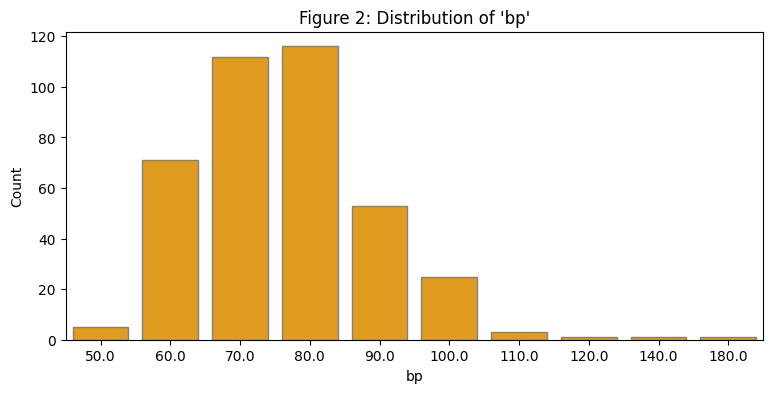

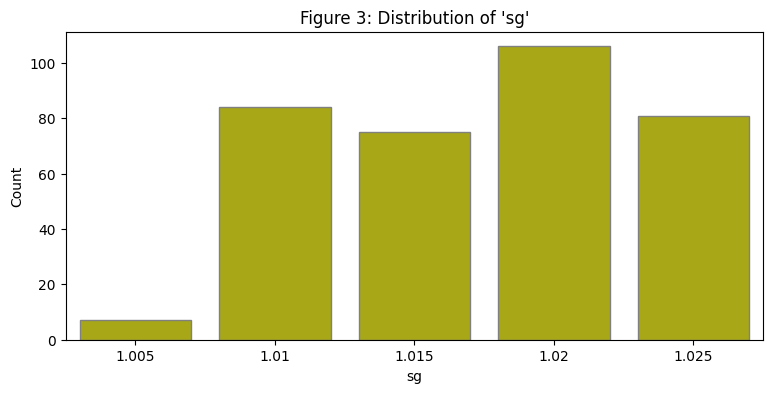

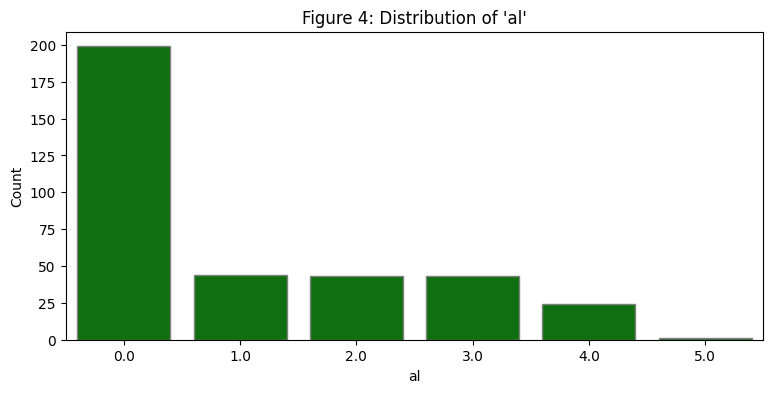

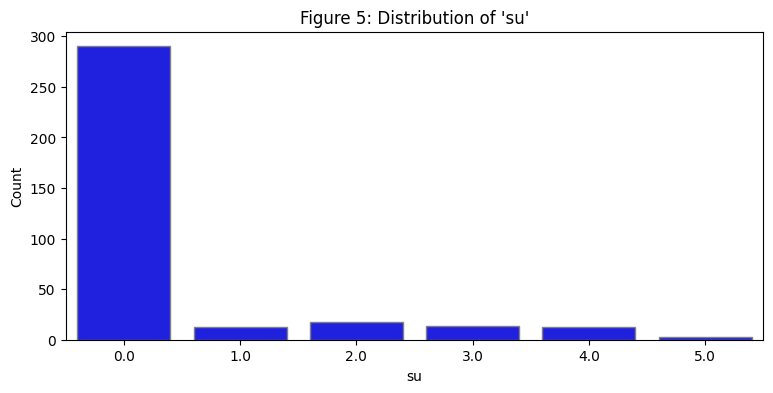

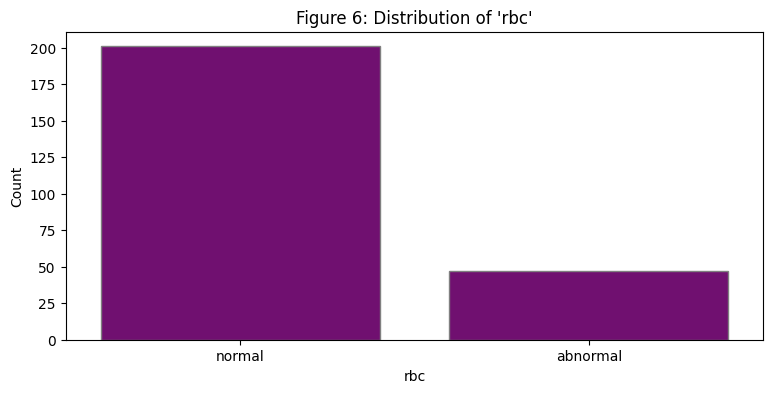

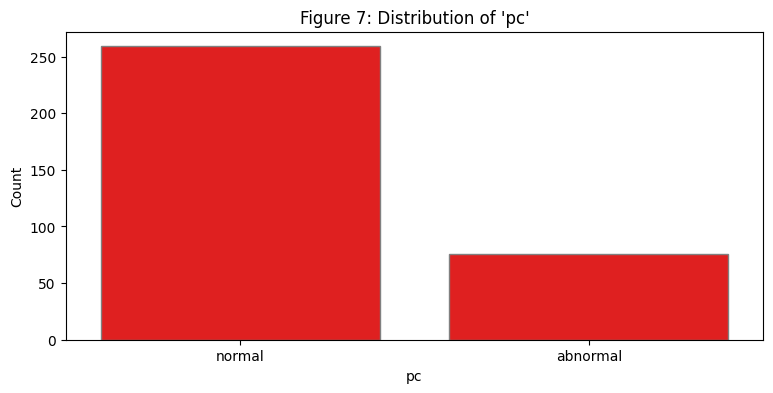

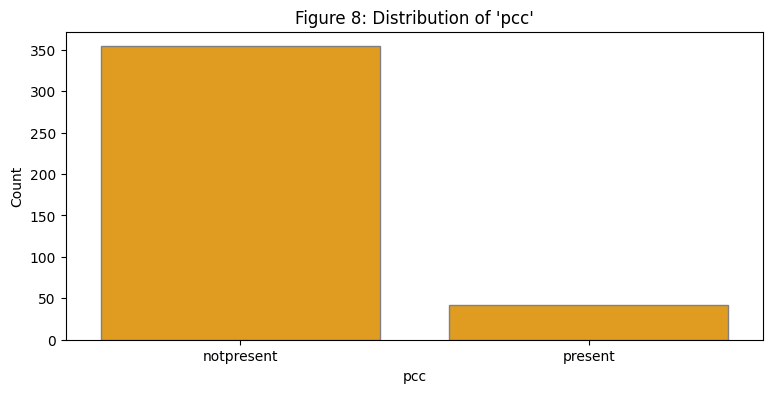

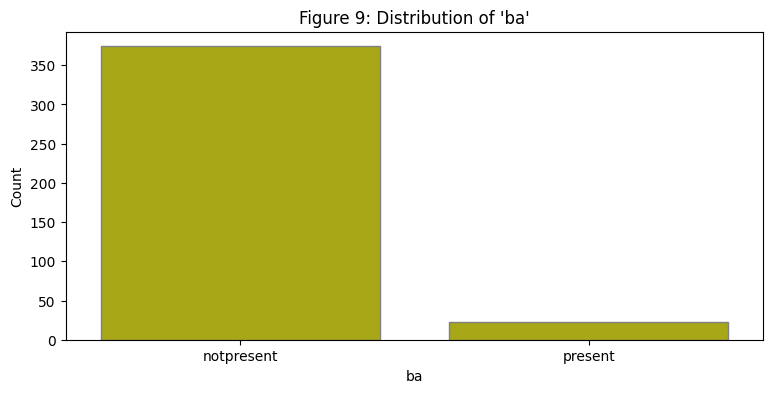

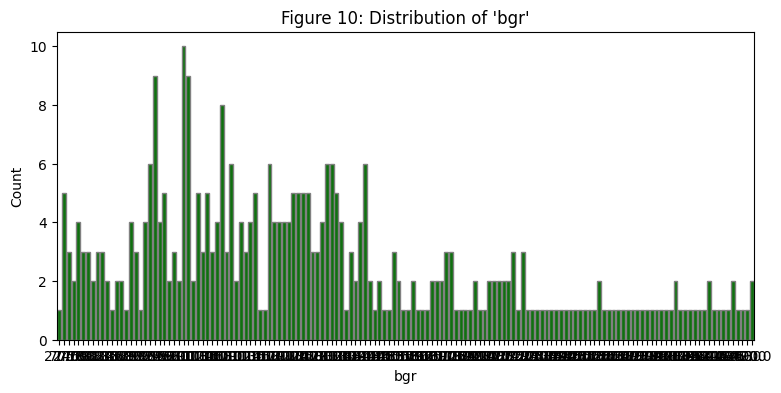

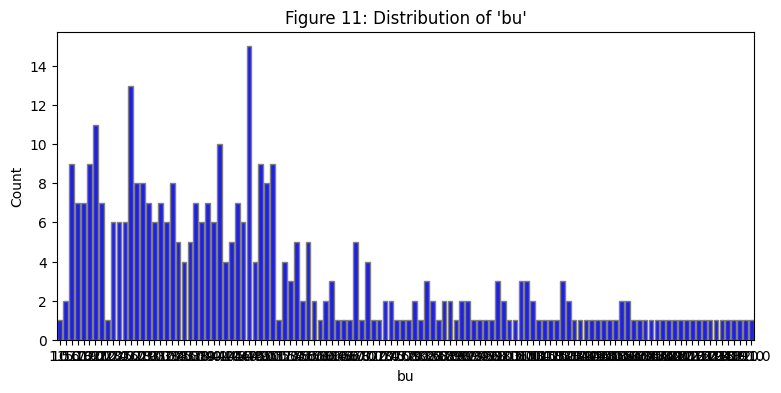

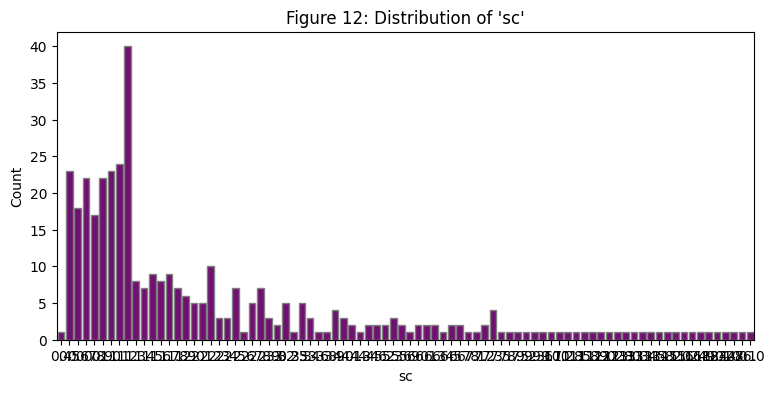

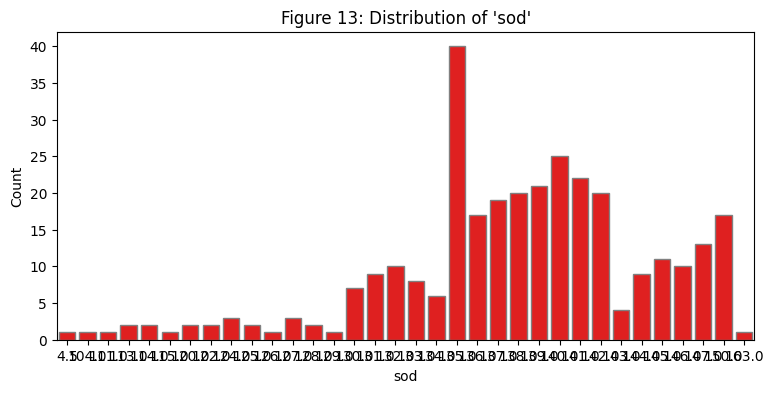

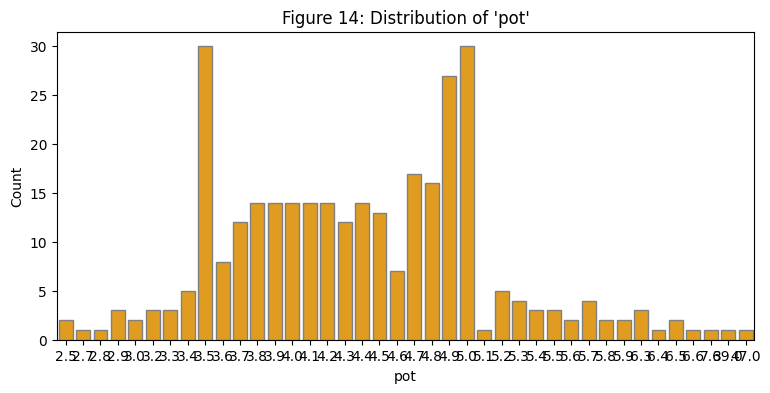

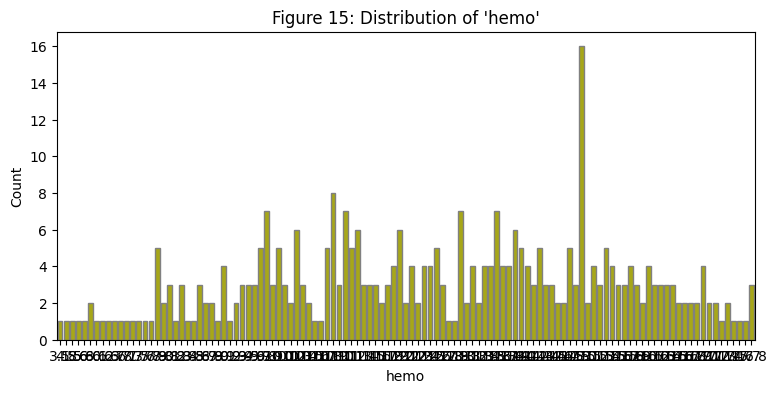

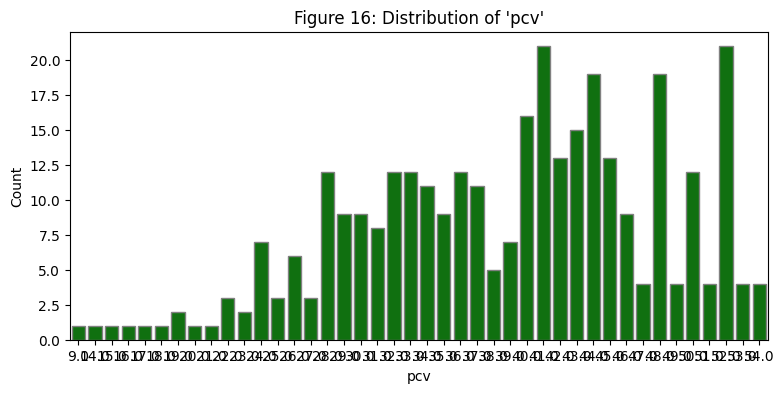

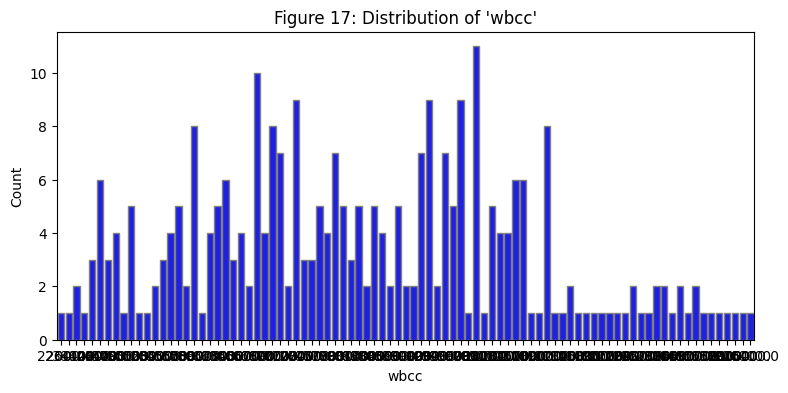

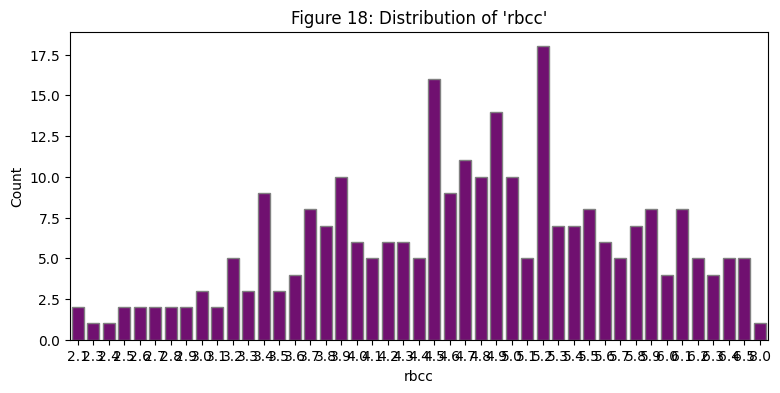

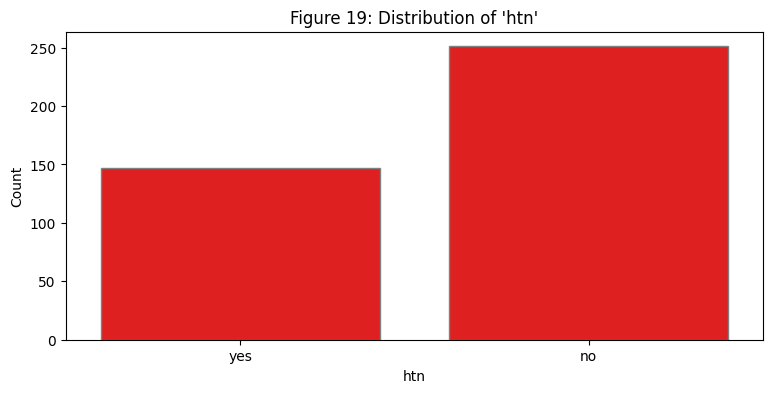

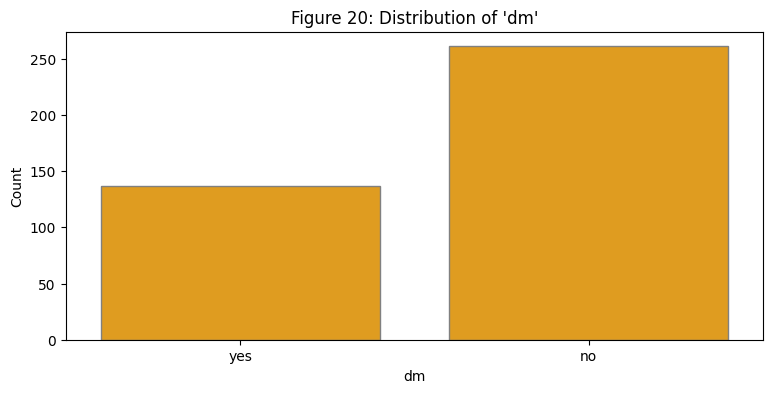

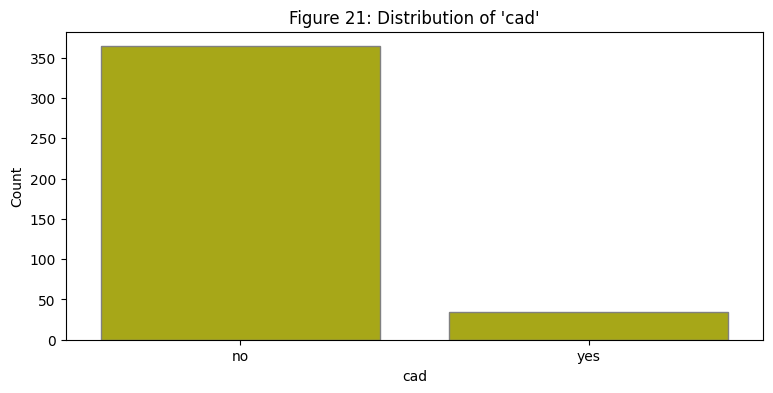

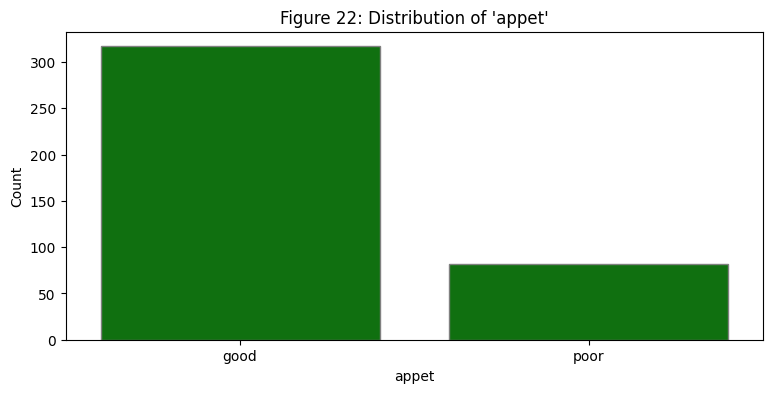

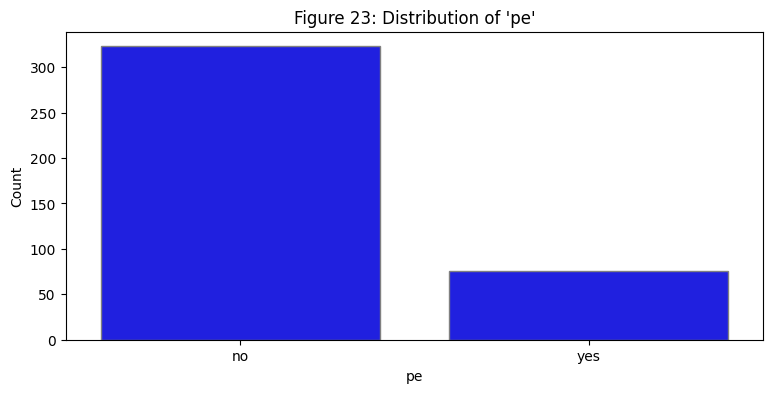

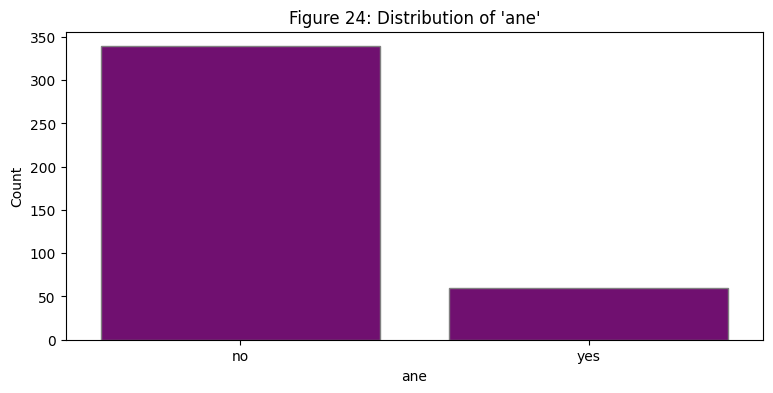

In [16]:
colors = ['r', 'orange', 'y', 'g', 'b', 'purple']

for i, var in enumerate(ckd_features.columns): # don't include predictor variable
    plt.figure(figsize=(9, 4))
    sns.countplot(
        data = ckd_features,
        x = var,
        color = colors[i % 6],
        edgecolor = 'gray',
    )


    plt.title(f"Figure {i+1}: Distribution of '{var}'")
    plt.xlabel(f"{var}")
    plt.ylabel(f"Count")
    plt.savefig(f'figures/fig{i+1}_dist-{var}')
    plt.show()

# Section 4: Association Between Variables

**Analyze variable relationships and their implications for feature selection or extraction (at least three statements).**

Worked on by: Taylor, Kyle

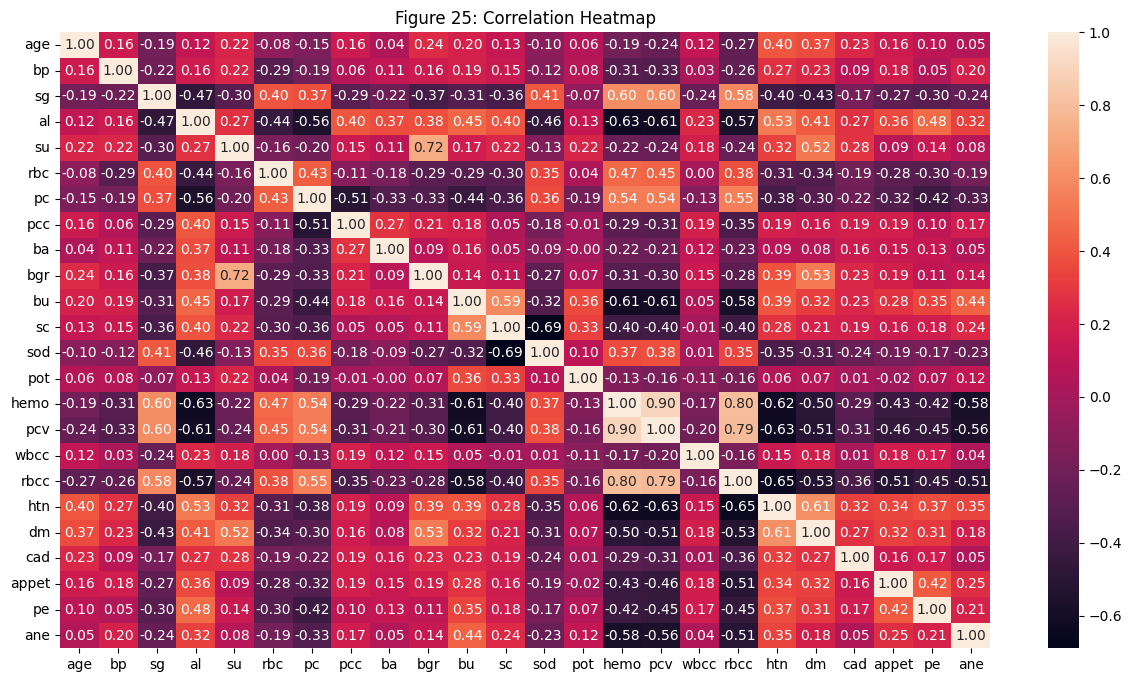

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(ckd_features_clean.corr(), annot = True, fmt=".2f")
plt.title('Figure 25: Correlation Heatmap')
plt.savefig('figures/fig25_corr-heatmap')
plt.show()

### Highest Correlations
1. Packed Cell Volume (pcv) and Hemoglobin (hemo) (0.90)
2. Red Blood Cell Count (rbcc) and Hemoglobin (hemo) (0.80)
3. Red Blood Cell Count (rbcc) and Packed Cell Volume (pcv) (0.79)

Variables with higher correlation values tend to hold the same significance/information when analyzing the data. For example, Packed Cell Volume is the measurement of the volume of red blood cells that is carried in blood, as well, hemoglobin is carried in red blood cells. Indicating that the increase in one variable will cause an increase in the other variable due to their similarities. This will aid in feature selection as extracting features that hold similar if not the same information will allow for better performance and precision of the model. Futhermore, we can analyze the negative correlation values as the closer they are to -1, the stronger of a negative correlation they hold signifying as one variable increases the other tends to decrease.

# Section 5: Missing Value Analysis and Handling

**Implement your strategy for identifying and addressing missing values in the dataset, or provide reasons for not addressing them.**

Worked on by: Kyle

<span style='color:red'>Note from Ahmed</span>

Before deciding what to do with missing values we should determine what causes the values to be missing. If a feature is missing at random, we may safely remove the row. If the feature is missing for statistical reasons, we must not remove the row and take this info account.

We use Little's MCAR test which tests the null hypothesis of the data being missing at random.

In [18]:
mt = MCARTest(method = 'little') # Null Hypothesis: Data is MCAR
p_value = mt.little_mcar_test(ckd_features_clean)
alpha = 0.05

if p_value < alpha:
    print(f'Reject null hypothesis: Data is not MCAR (p-value = {p_value:.4f})')
else:
    print(f'Do not reject null hypothesis: Data is MCAR (p-value = {p_value:.4f})')

Reject null hypothesis: Data is not MCAR (p-value = 0.0000)


We observe that by the MCAR test, the data appears to not be missing at random. Thus, we must account for this by imputing any missing values.

In [19]:
knn_imputer = KNNImputer(n_neighbors=5)
X_knn_imputed = knn_imputer.fit_transform(ckd_features_clean)
X_knn_imputed

array([[-0.20313902,  0.25837332,  3.        , ...,  0.        ,
         0.        ,  0.        ],
       [-2.59412412, -1.93685691,  3.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.61329491,  0.25837332,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-2.30254057,  0.25837332,  3.        , ...,  0.        ,
         0.        ,  0.        ],
       [-2.01095702, -1.2051135 ,  4.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.38002807,  0.25837332,  4.        , ...,  0.        ,
         0.        ,  0.        ]])

In [20]:
X_mean_imputed = SimpleImputer(missing_values = np.nan, strategy = 'mean').fit_transform(ckd_features_clean)
X_medi_imputed = SimpleImputer(missing_values = np.nan, strategy = 'median').fit_transform(ckd_features_clean)
X_mode_imputed = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent').fit_transform(ckd_features_clean)

In [21]:
X_iter_imputed = IterativeImputer(random_state=0, max_iter=20).fit_transform(ckd_features_clean)

In [22]:
X_aver_imputed = (X_knn_imputed + X_mean_imputed + X_medi_imputed + X_mode_imputed + X_iter_imputed) / 5
# X_aver_imputed = (X_knn_imputed + X_mean_imputed + X_medi_imputed + X_iter_imputed) / 4
X_aver_imputed

array([[-0.20313902,  0.25837332,  3.        , ...,  0.        ,
         0.        ,  0.        ],
       [-2.59412412, -1.93685691,  3.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.61329491,  0.25837332,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-2.30254057,  0.25837332,  3.        , ...,  0.        ,
         0.        ,  0.        ],
       [-2.01095702, -1.2051135 ,  4.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.38002807,  0.25837332,  4.        , ...,  0.        ,
         0.        ,  0.        ]])

In [23]:
ckd_features_clean.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')

<span style='color:yellow'>The values of the imputed data have changed - I have kept the cell above for comparison. The 3rd column, `sg`, is encoded as a nominal variable now, but holds the same information. The 3rd-last column, `appet`, has the 0's and 1's reversed because its `0` is `abnormal` not `normal`.</span>

In [24]:
X_aver_imputed = (X_knn_imputed + X_mean_imputed + X_medi_imputed + X_mode_imputed + X_iter_imputed) / 5
# X_aver_imputed = (X_knn_imputed + X_mean_imputed + X_medi_imputed + X_iter_imputed) / 4
X_aver_imputed

array([[-0.20313902,  0.25837332,  3.        , ...,  0.        ,
         0.        ,  0.        ],
       [-2.59412412, -1.93685691,  3.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.61329491,  0.25837332,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-2.30254057,  0.25837332,  3.        , ...,  0.        ,
         0.        ,  0.        ],
       [-2.01095702, -1.2051135 ,  4.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.38002807,  0.25837332,  4.        , ...,  0.        ,
         0.        ,  0.        ]])

<span style='color:red'>Ahmed note: Could throw in hard-impute (PCA imputation) as well? Could compare the imputation values across different methods and manually choose one that makes sense - doesn't need to be a democracy :^) e.g., tailed-distribution variable gets median imputation, whereas symmetric, unimodal variable gets mean</span>

In [25]:
np.sum(X_aver_imputed - X_knn_imputed) / (400 * 24)

0.0067321674339132975

<span style='color:yellow'>I believe the number above changed from `0.28` to `0.40`.</span>

In [26]:
np.count_nonzero(np.isnan(X_knn_imputed))

0

We have imputed all missing values.

Let's choose one of our data imputations.


In [27]:
# Temp

X_filled = X_aver_imputed ## use an average of all imputation methods

An alternative approach is to use a classfication method which allows for missing values such as random forest classification.

# Section 6: Outlier Analysis

**Implement your approach for identifying and managing outliers, or provide reasons for not addressing them.**

Worked on by: Ahmed

Of the featureset, `age`, `bp`, `bgr`, `bu`, `sc`, `sod`, `pot`, `hemo`, `pcv`, `wbcc`, and `rbcc` are numeric, so will be investigated for (marginal/univariate) outliers. `bp` has sufficiently few unique values and passes the eye test, so can be assumed to have no known outliers.


- Extra readings for logistic-regression-based outlier detection, i.e., binary classification and interpretable outlier detection so useful for us :^) : ~~["Detection of Outliers and Influential Observations in Binary Logistic Regression: An Empirical Study"](https://scialert.net/fulltext/?doi=jas.2011.26.35)~~, ~~["Logistic regression and the Linear Probability Model: outliers"](http://teaching.sociology.ul.ie:3838/logitinfl/)~~, and ["Outlier Detection in Logistic Regression: A Quest for Reliable Knowledge from Predictive Modeling and Classification"](https://pdfs.semanticscholar.org/6712/7a1c5131218518225822067da0370bfc578f.pdf).
    - Use leverage, standardized pearson residual, and DFFITS
    - Can "supercharge" logistic regression with interaction terms, categorical predictors, regularization, and non-linear bases.

- Should we have extra time, can look into jack-knifing for outlier detection in a classification context.

#### MCD (Minimum Covariance Determinant) estimator & Mahalnobis distance [@sklearn_api] [@rousseeuw1999fast] [@2020SciPy-NMeth] [@chisqrdmahaldist]

In [28]:
X_cov = MinCovDet(random_state=42).fit(X_filled)

# 99.9% p-value cutoff
cutoff = chi2.ppf(0.999, X_filled.shape[1])
X_pvals = chi2.sf(X_cov.dist_, X_filled.shape[1])

X_inliers = X_cov.dist_[X_cov.dist_ <= cutoff]
X_outliers = X_cov.dist_[X_cov.dist_ > cutoff]

In [29]:
print(f'Cutoff Mahalanobis distance: {cutoff:.3f}',
      f'Number of outlier observations (MCD): {X_outliers.shape[0]}',
      sep='\n')

Cutoff Mahalanobis distance: 51.179
Number of outlier observations (MCD): 192


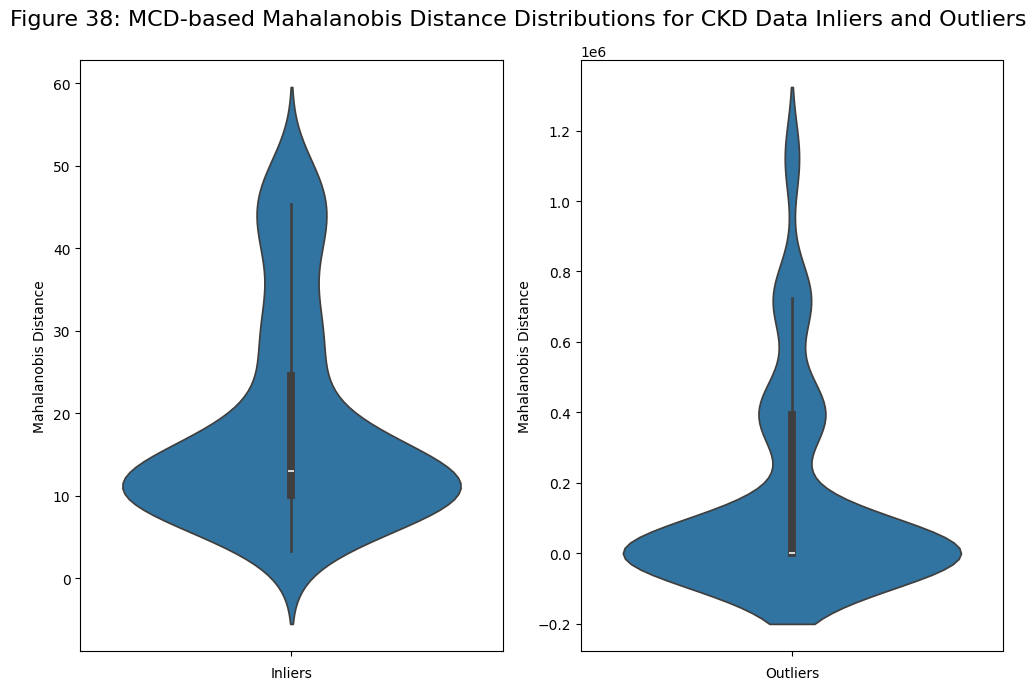

In [30]:
#fig-align: center

fig, ax = plt.subplots(1, 2, figsize=(10, 7))

sns.violinplot(X_inliers, ax=ax[0])
sns.violinplot(X_outliers, ax=ax[1])
ax[0].set(xlabel='Inliers',
          ylabel='Mahalanobis Distance')
ax[1].set(xlabel='Outliers',
          ylabel='Mahalanobis Distance'  )
fig.suptitle("Figure 38: MCD-based Mahalanobis Distance Distributions for CKD Data Inliers and Outliers", fontsize = 16)
plt.tight_layout()
plt.savefig('figures/fig38_MCD-Outlier')
plt.show()

While the Mahalanobis distance, $D$, obtained using MCD *can* be used for outlier detection because $D^2 \sim \chi^2_{\texttt{n\_features}}$, it suggests omitting over 190 (of 400) observations even with a 99.9% $\chi^2_{\texttt{n\_features}}$ p-value as the outlier threshold. As a result, its detected outliers will be kept to avoid the over-restricting the available dataset size.

#### Isolation Forests [@sklearn_api] [@liu2008isolation]

In [31]:
X_isolfrst = IsolationForest(random_state=42).fit(X_filled)

X_isolfrst_lbls = X_isolfrst.predict(X_filled)

print('Number of outlier observations (Isolation Forest):',
      sum(X_isolfrst_lbls == -1))

Number of outlier observations (Isolation Forest): 79


Again, while the outlier classifications obtained using isolation forests *can* be used for outlier detection, it suggests omitting approximately 80 (of 400) observations. Similar to MCD, detected outliers will be kept to avoid over-restricting the available dataset size.

#### LOF (Local Outlier Factor) [@sklearn_api] [@breunig2000lof]

In [32]:
X_lof = LocalOutlierFactor()

X_lof_lbls = X_lof.fit_predict(X_filled)

print('Number of outlier observations (LOF):',
      sum(X_lof_lbls == -1))

Number of outlier observations (LOF): 14


The outlier classifications obtained using LOF suggests omitting about 15 (of 400) observations. To exercise a conservative outlier omission policy, an observation will only be discarded if all three methods (MCD, isolation forests, and LOF) agree on an observation being an outlier.

*Note: This pre-processing uses __all__ data, not just train data, so there may be a leakage concern; however, it is out of course scope to investigate this.*

In [33]:
print('Number of outliers (MCD, Isolation Forest, and LOF agree):',
      sum((X_cov.dist_ > cutoff)
          & (X_isolfrst_lbls == -1)
          & (X_lof_lbls == -1)))

Number of outliers (MCD, Isolation Forest, and LOF agree): 8


#### MAD (Median Absolute Deviation) [@2020SciPy-NMeth] [@hampel1974influence]

In [34]:
X_mad = scistats.median_abs_deviation(X_filled)
X_med = np.median(X_filled, axis=0)

print('Number of outlier observations (MAD):',
      sum(np.any(
          (X_filled > X_med + 10*X_mad)
          | (X_filled < X_med - 10*X_mad),
          axis=1)))

Number of outlier observations (MAD): 263


Like MCD and isolation forests, MAD-based outlier classifications *can* be used for outlier detection, but it suggests omitting 263 (of 400) observations. These detected outliers will be kept to avoid over-restricting the available dataset size.

In [35]:
# Outliers removed
# X_filled = X_filled[~((X_cov.dist_ > cutoff)
#            & (X_isolfrst_lbls == -1)
#            & (X_lof_lbls == -1)), :]

# Section 7: Subgroup Analysis

**Explore potential sub-groups within the data, employing appropriate data science methods to find the sub-groups of patients and visualize the sub-groups. The sub-group analysis must not include the labels (for CKD patients and healthy controls).**

Worked on by: Kyle

For subgroup analysis, an easy choice is to use K-Means clustering. We will do this first for multiple values of K, and then attempt to visualize it.

However, in order to be able to visualize the clusters, we must first reduce the number of features as it will be impossible to visualize the current data in twenty-four dimensional space!

Thus, our workflow for Section 7 is as follows: determine the optimal value of K, imploy PCA to reduce to two principal components, then, we use our earlier described K-Means clustering.

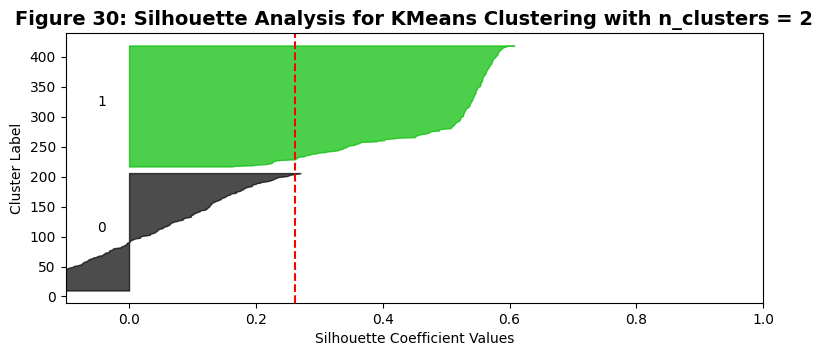

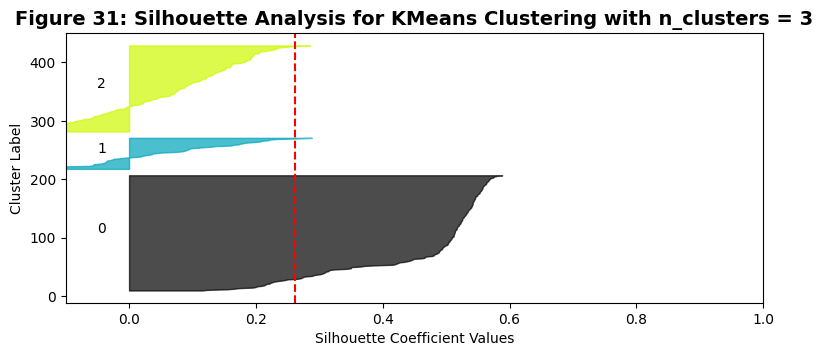

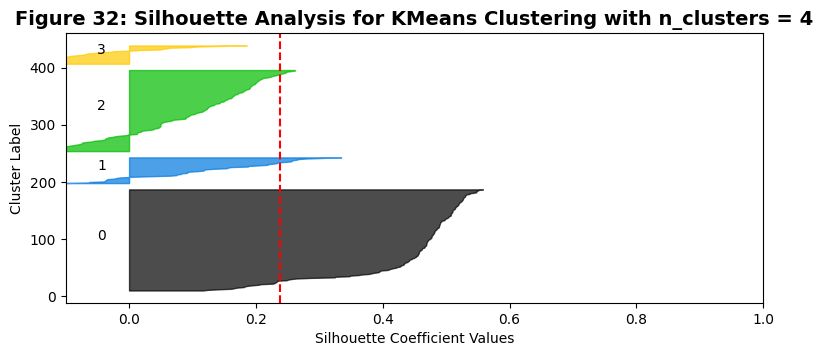

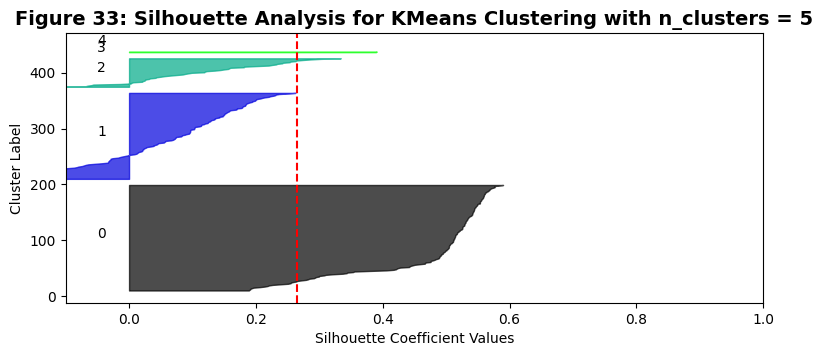

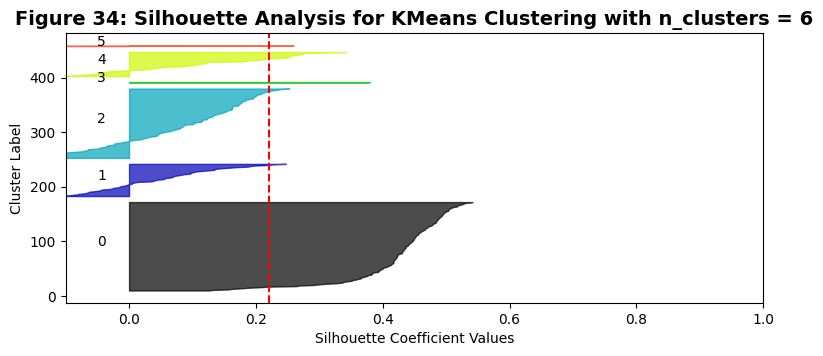

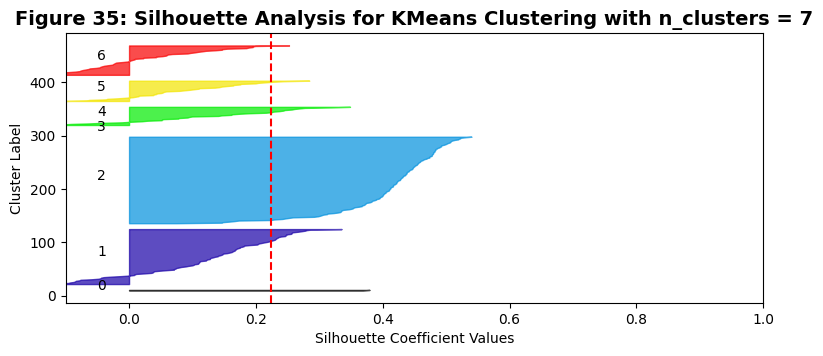

In [36]:
k_values = list(range(2,8))
silhouette_scores = []

for k in k_values:
    km = KMeans(n_clusters = k, n_init = 20, random_state=0)
    cluster_labels = km.fit_predict(X_filled)
    silhouette_avg_km = silhouette_score(X_filled, cluster_labels)

    silhouette_scores.append(silhouette_avg_km)

    sample_silhouette_values = silhouette_samples(X_filled, cluster_labels)
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18/2, 7/2)
    ax1.set_xlim([-0.1, 1])

    y_lower = 10
    
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for various cluster")
    ax1.set_xlabel("Silhouette Coefficient Values")
    ax1.set_ylabel("Cluster Label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg_km, color="red", linestyle="--")
    plt.title(
        f"Figure {28+k}: Silhouette Analysis for KMeans Clustering with n_clusters = {k}",
        fontsize=14,
        fontweight="bold",
    )
    plt.savefig(f'figures/fig{28+k}_KMeans-SilAna-{k}')


We also plot the silhouette scores.

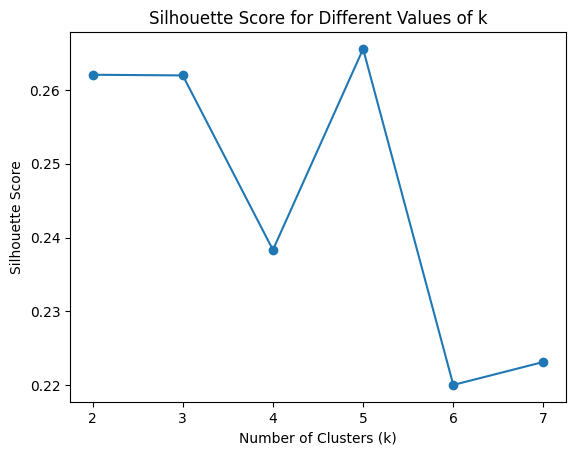

In [37]:
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.savefig(f'figures/fig36_KMeans-Silhouettes')
plt.show()

In [38]:
optimal_k = k_values[np.argmax(silhouette_scores)]
optimal_score = np.max(silhouette_scores)

print(f"The optimal value of k is {optimal_k} with a silhouette score of {optimal_score:.3f}")

The optimal value of k is 5 with a silhouette score of 0.266


By the silhouette analysis and the silhouette score, we suspect that $K=2$ might be the ideal number of clusters.

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
pca.fit(X_filled)

explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

print(explained_variance)
print(cumulative_explained_variance)

[0.34765258 0.10760986 0.08385818 0.06897937 0.06552512 0.05736563]
[0.34765258 0.45526244 0.53912062 0.60809998 0.6736251  0.73099073]


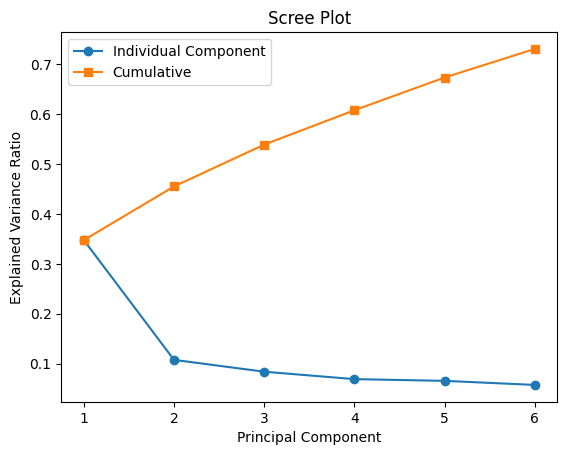

In [40]:
plt.plot(range(1, 6+1), explained_variance[:6], '-o', label = 'Individual Component')
plt.plot(range(1, 6+1), cumulative_explained_variance[:6], '-s', label = 'Cumulative')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend()
plt.show()

We have that a single principal compnonent is sufficient, however for visualization sake, we take two principal components.

In [41]:
print(f"Proportion of variance explained by the first two principal components: {cumulative_explained_variance[1]:.3f}")

Proportion of variance explained by the first two principal components: 0.455


In [42]:
km_best = KMeans(n_clusters=optimal_k, n_init=30, random_state=0)
km_best.fit(X_filled)
pd.Series(km_best.labels_).value_counts()

1    163
2    135
3     60
0     40
4      2
Name: count, dtype: int64

In [43]:
print(f"The inertia is {km_best.inertia_:.3f}")

The inertia is 3307.680


In [44]:
df2 = pd.DataFrame(pca.transform(X_filled), columns=ckd_features.columns[:6]) # note to self: check over this line of code
Xpcs = df2.iloc[:, :2]

In [45]:
centers_transformed = pca.transform(pd.DataFrame(km_best.cluster_centers_))

In [46]:
centers_transformed.shape

(5, 6)

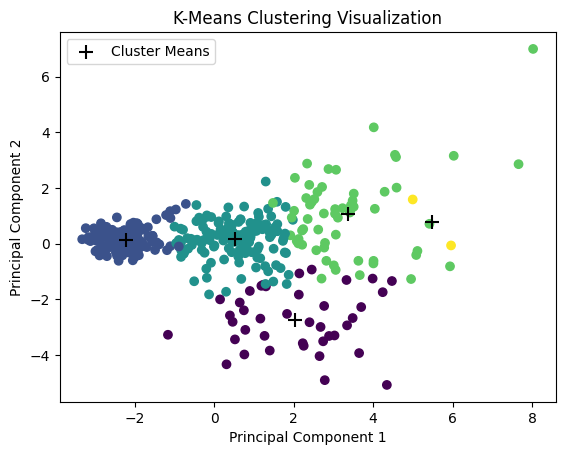

In [47]:
# plt.figure(figsize=(10,1))
plt.scatter(Xpcs.iloc[:, 0], Xpcs.iloc[:, 1], c=km_best.labels_)
plt.scatter(centers_transformed[:, 0], centers_transformed[:, 1], c='k', marker='+', s=100, label='Cluster Means') # Plot the means
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.title(f'K-Means Clustering Visualization')
plt.legend()
plt.savefig(f'figures/fig37_KMeansClustVis')
plt.show()

# Section 8: Data Splitting

**Segregate 30% of the data for testing, using a random seed of 1. Use the remaining 70% for training and model selection.**

Worked on by: Kyle

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X_filled,
    y_r,
    train_size = 0.7,
    test_size = 0.3, # train is 70%, test is 30% 
    random_state = 1,
    stratify = y_r,
)

NameError: name 'y_r' is not defined

# Section 9: Classifier Choices

**Identify the two classifiers you have chosen and justify your selections.**

Worked on by: Kyle

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

y_pred_knn_all = []

for k in range(1, 30+1):

    knn__ = KNeighborsClassifier(
        n_neighbors = k,
        algorithm = 'auto',
    )

    knn__.fit(X_train, y_train.to_numpy().ravel())
    y_pred_knn_current = knn__.predict(X_test)

    y_pred_knn_all.append(y_pred_knn_current)

### Random Forest

In [140]:
from sklearn.ensemble import RandomForestClassifier

rf__ = RandomForestClassifier(
    n_estimators = 1000,
    criterion = 'gini',
)

rf__.fit(X_train, y_train.to_numpy().ravel())
y_pred_rf = rf__.predict(X_test)

### Deep Learning Approach

In [141]:
X_train.shape

(280, 24)

In [ ]:
# can we try using deep learning for one of the classifier choices?

import torch
import assignment6_lib as lib

# Training loop

model = lib.Classifier()
criterion = torch.nn.BCELoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
optimizer = torch.optim.Adam(model.parameters(), lr=0.00011, weight_decay=0.005)

training_loss_hist, validation_loss_hist, accuracy_history = lib.train(model, criterion, optimizer, 15000, X_filled, y_r)
    

In [143]:
import pickle

version = lib.get_current_version()

torch.save(model, f'models/model{version}.pth')

with open(f'losses/train_loss_{version}.pkl', 'wb') as handle:
    pickle.dump(training_loss_hist, handle)

with open(f'losses/valid_loss_{version}.pkl', 'wb') as handle:
    pickle.dump(validation_loss_hist, handle)

with open(f'losses/accuracy_{version}.pkl', 'wb') as handle:
    pickle.dump(accuracy_history, handle)

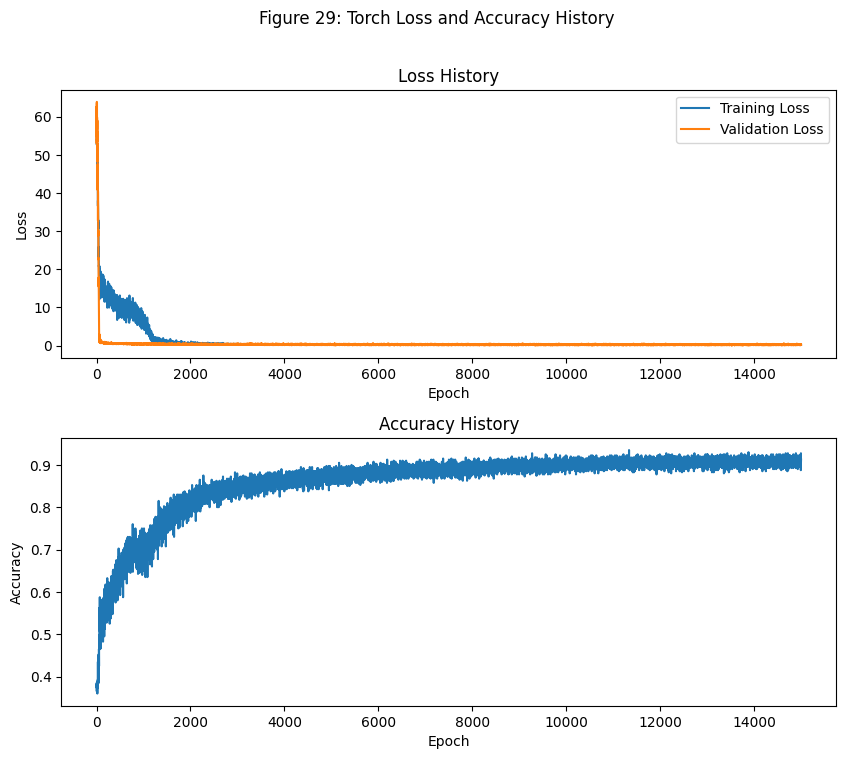

In [144]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

ax1.plot(training_loss_hist, label="Training Loss")
ax1.plot(validation_loss_hist, label="Validation Loss")
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.set_title('Loss History')

ax2.plot(accuracy_history)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy History')

plt.suptitle('Figure 29: Torch Loss and Accuracy History')
plt.subplots_adjust(hspace=0.3)
plt.savefig('figures/fig29_torch-loss-acc')
plt.show()

In [145]:
model.eval()
with torch.no_grad():
    y_pred_dl = (model(torch.tensor(X_test, dtype=torch.float32)) >= 0.5).float()
y_pred_dl = y_pred_dl.detach().numpy()

print(1 - float((np.abs(y_pred_dl - y_test)).sum().iloc[0])/400)

0.9875


# Section 10: Performance Metrics

**Outline the two metrics for comparing the performance of the classifiers.**

Worked on by: Kyle, Taylor

In [146]:
from sklearn.metrics import accuracy_score

acc_knn_all = []

for k in range(1, 30+1):

    acc_knn_current = accuracy_score(
        y_test, # Add Y-actual
        y_pred_knn_all[k-1], # Add Y-prediction
    )
    acc_knn_all.append(acc_knn_current)

best_knn_k = np.argmax(acc_knn_all)
best_knn_acc = acc_knn_all[best_knn_k]

acc_rf = accuracy_score(
    y_test, # Add Y-actual
    y_pred_rf, # Add Y-prediction
)

acc_dl = accuracy_score(
    y_test,
    y_pred_dl,
)

print(f"Accuracy Score for Best KNN with k={best_knn_k+1}: {best_knn_acc:.4f}")
print(f"Accuracy Score for Random Forest with [note to self: add params]: {acc_rf:.4f}")
print(f"Accuracy Score for Deep Learning with [note to self: add params]: {acc_dl:.4f}")

Accuracy Score for Best KNN with k=1: 0.7667
Accuracy Score for Random Forest with [note to self: add params]: 1.0000
Accuracy Score for Deep Learning with [note to self: add params]: 0.9583


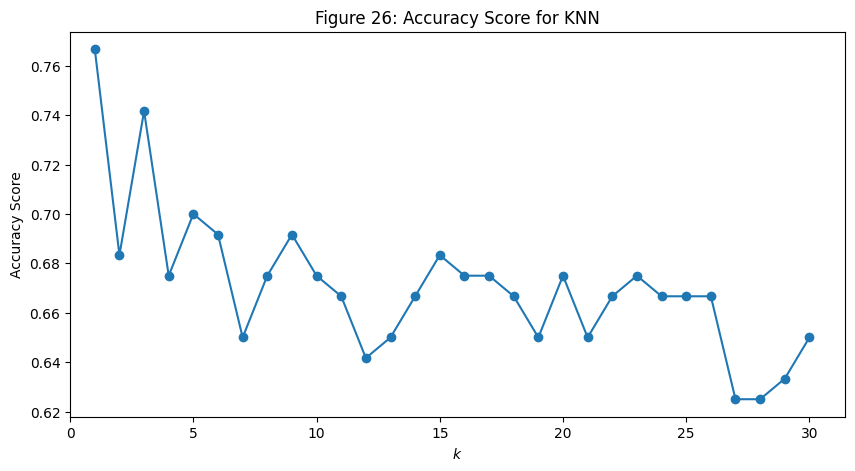

In [147]:
plt.figure(figsize=(10,5))
plt.plot(range(1,30+1), acc_knn_all, '-o')
plt.title('Figure 26: Accuracy Score for KNN')
plt.xlabel(r'$k$')
plt.ylabel('Accuracy Score')
plt.xlim(0, None)
plt.savefig('figures/fig26_knn_accuracies')
plt.show()

In [148]:
from sklearn.metrics import confusion_matrix

knn_specificities_all = []
knn_sensitivities_all = []

for k in range(1, 30+1):
    cm_current = confusion_matrix(
        y_pred_knn_all[k-1],
        y_test,
    )
    specificity_current = cm_current[0,0] / (cm_current[0,0]+cm_current[0,1])
    sensitivity_current = cm_current[1,1] / (cm_current[1,0]+cm_current[1,1])
    knn_specificities_all.append(specificity_current)
    knn_sensitivities_all.append(sensitivity_current)

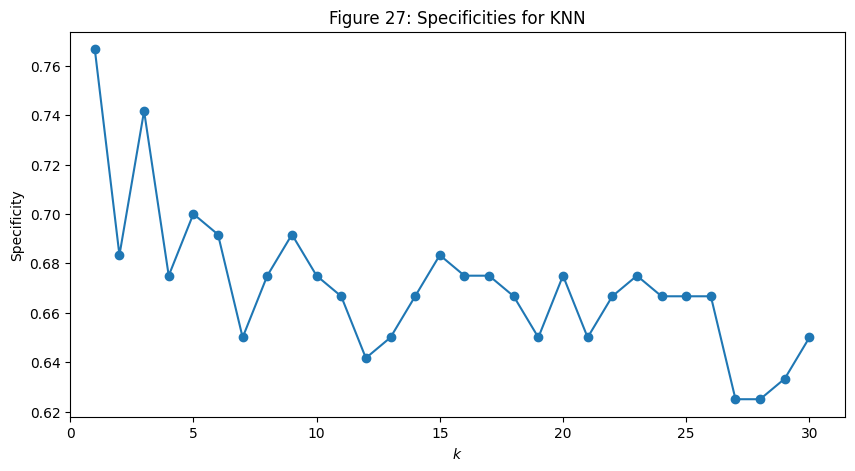

In [149]:
plt.figure(figsize=(10,5))
plt.plot(range(1,30+1), acc_knn_all, '-o')
plt.title('Figure 27: Specificities for KNN')
plt.xlabel(r'$k$')
plt.ylabel('Specificity')
plt.xlim(0, None)
plt.savefig('figures/fig27_knn_specificities')
plt.show()

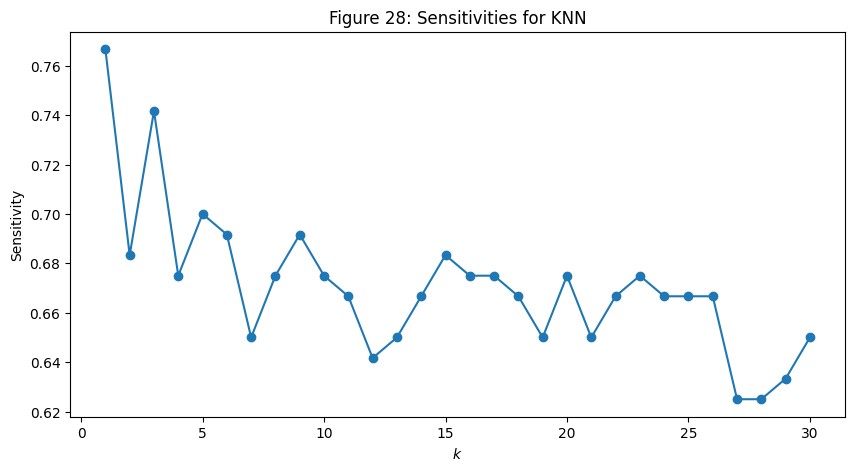

In [150]:
plt.figure(figsize=(10,5))
plt.plot(range(1,30+1), acc_knn_all, '-o')
plt.title('Figure 28: Sensitivities for KNN')
plt.xlabel(r'$k$')
plt.ylabel('Sensitivity')
plt.savefig('figures/fig28_knn_sensitivities')
plt.show()

In [151]:
cm_rf = confusion_matrix(y_pred_rf, y_test) ## REPLACE WITH CONFUSION MATRIX

total = np.sum(cm_rf)

accuracy = ( cm_rf[0,0] + cm_rf[1,1] ) / total
print (f'Accuracy : {accuracy:.4f}')

specificity = cm_rf[0,0] / ( cm_rf[0,0] + cm_rf[0,1] )
print(f'Specificity : {specificity:.4f}')

sensitivity = cm_rf[1,1] / ( cm_rf[1,0] + cm_rf[1,1] )
print(f'Sensitivity : {sensitivity:.4f}')

Accuracy : 1.0000
Specificity : 1.0000
Sensitivity : 1.0000


In [152]:
from sklearn.metrics import classification_report

cr_rf = classification_report(y_true = y_test, y_pred = y_pred_rf)
print(cr_rf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        75

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [153]:
cm_dl = confusion_matrix(y_pred_dl, y_test) ## REPLACE WITH CONFUSION MATRIX

total = np.sum(cm_dl)

accuracy = ( cm_dl[0,0] + cm_dl[1,1] ) / total
print (f'Accuracy : {accuracy:.4f}')

specificity = cm_dl[0,0] / ( cm_dl[0,0] + cm_dl[0,1] )
print(f'Specificity : {specificity:.4f}')

sensitivity = cm_dl[1,1] / ( cm_dl[1,0] + cm_dl[1,1] )
print(f'Sensitivity : {sensitivity:.4f}')

Accuracy : 0.9583
Specificity : 0.9167
Sensitivity : 0.9861


In [1]:
from sklearn.metrics import roc_auc_score, roc_curve 

In [2]:
#KNN
fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_pred_knn_all[best_knn_k])
auc_knn = roc_auc_score(y_test, y_pred_knn_all[best_knn_k])

#Random Forest
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_rf)

#Deep Learning Approach
fpr_dl, tpr_dl, thresholds = roc_curve(y_test, y_pred_dl)
auc_dl = roc_auc_score(y_test, y_pred_dl)

print("AUC Score for KNN:", auc_knn)
print("AUC Score for Random Forest:", auc_rf)
print("AUC for Deep Learning Approach:", auc_dl)

NameError: name 'y_test' is not defined

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_dl, tpr_dl, label='Deep Learning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
#Optimal Threshold

#KNN
j_statistic_knn = tpr_knn - fpr_knn
optimal_index_knn = np.argmax(j_statistic_knn)
optimal_threshold_knn = thresholds[optimal_index_knn]

#Random Forest
j_statistic_rf = tpr_rf - fpr_rf
optimal_index_rf = np.argmax(j_statistic_rf)
optimal_threshold_rf = thresholds[optimal_index_rf]

#Deep Learning
j_statistic_dl = tpr_dl - fpr_dl
optimal_index_dl = np.argmax(j_statistic_dl)
optimal_threshold_dl = thresholds[optimal_index_dl]

print("Optimal Threshold for KNN:", optimal_threshold_knn)
print("Optimal Threshold for Random Forest:", optimal_threshold_rf)
print("Optimal Threshold for Deep Learning Approach:", optimal_threshold_dl)

**Note(Taylor): change w/ update to section 8**

# Section 11: Feature Selection and Extraction

**Implement methods to enhance the performance of at least one classifier in (9). The answer for this question can be included in (12).**

Worked on by: 

# Section 12: Classifier Comparison

**Utilize the selected metrics to compare the classifiers based on the test set. Discuss your findings (at least two statements).**

Worked on by: Taylor

As outlined in Section 10, the chosen classifiers were analyzed based on accuracy, specificity and sensitivity, AUC score (Area under the curve (ROC)), and additionally for Random Forest a classification report was completed. We have chosen these metrics as they produce valuable information regarding correctly predicted cases, along with model performance at different thresholds. Through accuracy, KNN achieved 77%, Random Forest achieved 100%, and Deep Learning achieved 96% (all rounded to the nearest percent). Where through AUC scores, KNN achieved 76%, Random Forest achieved 100%, and Deep Learning achieved 95%. From these insights, Random Forest is the most admirable classifier choice.

**Discuss Section 11 (to be added)**

# Section 13: Interpretable Classifier Insight

**After re-training the interpretable classifier with all available data, analyze and interpret the significance of predictor variables in the context of the data and the challenge (at least two statements).**

Worked on by: 

# [BONUS] Section 14: Subgroup Improvement Strategy

**If sub-groups were identified, propose and implement a method to improve one classifier performance further. Compare the performance of the new classifer with the results in (12).**

# Section 15: Team Contributions

**Document each team member's specific contributions related to the questions above.**



# Section 16: Link 

Link to the public GitHub repository.

[https://github.com/kyleosung/Stats_3DA3_A6](https://github.com/kyleosung/Stats_3DA3_A6)

\newpage

## Grading scheme 

\begin{table}[H]
\begin{tabular}{p{0.15\textwidth}  p{0.65\textwidth}}
1.   & Answer [1]\\
2.   & Codes [2] \\
     & OR answer [2]\\
3.   & Codes [3] and answer [3]\\
4.   & Codes [2] and answer [3]\\
5.   & Codes [2]\\
     & OR answer [2]\\
6.   & Codes [2] \\
     & OR answer [2]\\
7.   & Codes [3] and Plot [1]\\
8.   & Codes [1]\\
9.   & Answers [2]\\
10.   & Describe the two metrics [2]\\
11.   & Codes [2] \\
      & these codes can be included in (12)\\
12.   & Codes (two classifiers training,\\
     & model selection for each classifier, \\
     & classifiers comparisons) [5] and answer [2]\\
13.   & Codes [1] and answers [2]\\
14.   & Codes and comparison will \\
     & give \textbf{bonus 2 points for the final grade}.\\
\end{tabular}
\end{table}

**The maximum point for this assignment is 39. We will convert this to 100%.**

**All group members will receive the same grade if they contribute to the same.**
